<a href="https://colab.research.google.com/github/cartman12/EU-Transporation-CO2-Data/blob/master/project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A peek into Europe's public transportation and CO2 Emission

In [19]:
from google.colab import files
uploaded = files.upload()

Saving t2020_rk310.tsv to t2020_rk310.tsv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## DataFrame manipulation and cleaning - EU percentage of passengers per transportaion method between 1990 -2016.

In [0]:
df = pd.read_csv('t2020_rk310.tsv', sep='\t|\,', na_values = ': ', engine = 'python') # We have two  spererators, tab and comma, and we converted all ":" to NaN values

df = df.rename(columns=lambda x: x.strip()) # Column headers have whitespace at their right side, we stripping that whitespace

df.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df.columns) ``

cols = list(df.columns[3:]) # Get select the numerical columns only
df = df.astype('str') # Convert df from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df[col] = df[col].str.strip(" e b be r d p")
  df[col] = df[col].replace('nan', np.nan)
  df[col] = df[col].replace(': z', 0)
df['country'] = df['country'].replace('EL', 'GR')
df['country'] = df['country'].replace('UK', 'GB')
df[cols] = df[cols].astype('float') # Convert string to float

In [22]:
countries = pd.read_csv('https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv') # Load a country code dataset
countries.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [0]:
df = df.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df = df.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns

In [0]:
k = list(df.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df.columns[-1]) # Insert the 'country' column name at index 0 of the list
df = df.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list
dfT = df.T
dfT = dfT.fillna(method = 'bfill')
df = dfT.T
df[cols] = df[cols].astype('float')


## Looking at the data, choosing a country as case study

In [0]:
# Create a column that depicts the percentgae of change in each method and country from 1990 to 2016.
df['Percentage_of_change'] = ((df['2016'] - df['1990'])/df['1990']).astype('float')

In [26]:
df.nlargest(1, ['Percentage_of_change'])  # Filter by the largest 9 percentge of change

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
94,Turkey,PC,CAR,27.5,27.6,28.1,30.8,34.8,36.5,37.2,38.2,40.0,42.7,45.9,49.6,49.0,49.2,51.3,52.3,53.9,54.9,56.3,56.9,59.3,59.2,61.6,63.7,64.9,67.6,70.1,1.549091


Based on the above table, Turkey seems like an interesting case study, showing a drastic shift from public transportation into private transportation.

In [27]:
df.isnull().sum()

country                 0
unit                    0
vehicle                 0
1990                    0
1991                    0
1992                    0
1993                    0
1994                    0
1995                    0
1996                    0
1997                    0
1998                    0
1999                    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
Percentage_of_change    3
dtype: int64

In [28]:
df.shape

(99, 31)

In [29]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,96.000000
mean,33.334343,33.334343,33.336364,33.339394,33.335354,33.334343,33.337374,33.332323,33.333333,33.331313,33.335354,33.331313,33.336364,33.334343,33.333333,33.335354,33.331313,33.333333,33.333333,33.329293,33.337374,33.330303,33.332323,33.332323,33.336364,33.331313,33.334343,-0.067317
std,31.220301,31.429997,31.680795,31.758999,31.917123,32.093897,32.942927,32.545735,32.795638,33.111058,33.071180,33.183016,33.484890,33.665119,33.857194,34.073786,34.222083,34.247982,34.156094,34.776421,34.633641,34.456164,34.652643,34.700582,34.735747,34.761921,34.903105,0.405121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.841509
25%,7.200000,7.150000,7.100000,7.700000,7.350000,7.300000,6.550000,7.350000,7.250000,7.000000,6.950000,6.750000,6.600000,6.400000,6.350000,6.300000,6.250000,6.500000,6.400000,6.200000,6.350000,6.100000,6.100000,6.450000,6.250000,6.500000,6.650000,-0.288704
50%,17.300000,17.300000,17.300000,17.300000,16.800000,15.500000,14.600000,15.000000,14.600000,13.800000,13.600000,13.700000,13.300000,13.400000,13.200000,12.900000,12.400000,14.000000,13.000000,13.000000,12.700000,13.200000,13.700000,13.200000,12.200000,12.300000,12.300000,-0.022028
75%,67.350000,67.350000,67.750000,68.100000,69.000000,69.000000,72.250000,72.250000,72.950000,73.750000,72.950000,73.400000,75.450000,76.050000,76.750000,76.600000,77.150000,77.450000,76.900000,78.300000,78.100000,77.350000,77.600000,78.450000,78.750000,79.200000,80.000000,0.093821
max,88.600000,88.600000,88.600000,88.900000,89.200000,89.200000,94.700000,88.700000,88.600000,88.800000,88.600000,88.600000,89.100000,88.900000,88.800000,89.800000,90.900000,91.000000,91.200000,92.300000,91.700000,90.800000,91.900000,91.400000,89.800000,89.600000,89.900000,1.549091


## Ploting a histogram - Comparing the use of cars vs the use of public transportation

In [0]:
def selectcountry(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple', rot = 90)
  ax2.legend(labels = ['Public Transportation (Bus + Train)', 'Cars','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1990-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 1 - Mohamad Ali Nasser                                                                                                                                                      Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  
  return plt.show()   

In [44]:
selectcountry(df, 'Turkey')

<IPython.core.display.Javascript object>

## Plotting The mean of EU transportation vs Turkey

In [0]:
# Seperate the data into three dtaframes, Car, Bus nad Train

cars = df[cols].loc[df['vehicle'] == 'CAR'].T  # Transpose because the data its easier to maniopulate the data this way in this particular dataset.
cars['mean'] = cars.loc[: , :].mean(axis=1) # Mean of of all collumns in a new column

bus = df[cols].loc[df['vehicle'] == 'BUS_TOT'].T
bus['mean_bus'] = bus.loc[: , :].mean(axis=1)

train = df[cols].loc[df['vehicle'] == 'TRN'].T
train['mean_train'] = train.loc[: , :].mean(axis=1)

public_transport = pd.concat([bus['mean_bus'], train['mean_train']], axis=1, sort=False) # Concat both train and bus to make up the public transportation sector. Note, both have the same shape.

public_transport['total_mean'] = bus['mean_bus'] + train['mean_train']

In [0]:
# Selecting Turkey

turkey = df.loc[df['country'] == 'Turkey'] # Select the country
turkey = turkey.T # Transpose the data
turkey.columns = turkey.iloc[2] # Reindex the columns' header
turkey = turkey.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
turkey['public_transport'] = turkey['TRN'] + turkey['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style

ax = public_transport['total_mean'].plot(figsize = (15,7), color = 'black')
ax1 = turkey['public_transport'].plot(figsize = (15,7), color = 'purple')

# Set y ticks
plt.yticks([ 0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(labels = ['','10', '20', '30', '40','50','60','70','80%'], alpha =0.7)

# Add labels to lines
ax.text(x = 4, y = 70, s = 'Turkey Trendline', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 9, y = 26, s = 'EU Trendline', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Title, xy labels and text
plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
ax.text(x = -2, y = 85, s = 'Public Transportation Trends: Turkey and Europe \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 2 - Mohamad Ali Nasser                                                                                    Data Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

In [35]:
df.loc[df['vehicle'] == 'CAR'].nsmallest(1, ['Percentage_of_change'])  # Chooing the countyr that underwent the largest negative change in cars.

,country,unit,vehicle,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Percentage_of_change
10,Switzerland,PC,CAR,82.1,81.1,81.4,80.9,80.6,83.1,83.2,83.2,81.8,81.7,81.1,80.6,80.1,79.8,79.6,78.4,77.9,77.4,77.8,77.5,77.3,74.8,75.0,75.0,74.6,74.4,74.3,-0.095006


So will will add Switzerland to the graph and compare

In [0]:
swiss = df.loc[df['country'] == 'Switzerland'] # Select the country
swiss = swiss.T # Transpose the data
swiss.columns = swiss.iloc[2] # Reindex the columns' header
swiss = swiss.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
swiss['public_transport'] = swiss['TRN'] + swiss['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style

ax = public_transport['total_mean'].plot(figsize = (15,7), color = 'black')
ax1 = turkey['public_transport'].plot(figsize = (15,7), color = 'purple')
ax2 = swiss['public_transport'].plot(figsize = (15,7), color = 'green')

# Set x and y ticks
plt.yticks([ 0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(labels = ['','10', '20', '30', '40','50','60','70','80%'], alpha =0.7)
 # Set xlim so that we can add the line
# plt.xticks([int(num) for num in cols])

ax.text(x = 4, y = 70, s = 'Turkey Trendline', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 9, y = 26, s = 'EU Trendline', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax2.text(x = 6, y = 12, s = 'Swiss Trendline', color = 'green', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Titlem labels and text
plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
ax.text(x = -2, y = 85, s = 'Public Transportation Trends: Turkey, Switzerland and Europe \nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - FIG 3 - Mohamad Ali Nasser                                                                                      Data Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

## Adding both plots together

In [0]:
def selectcountry_EU(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.columns = name.iloc[2] # Reindex the columns' header
  name = name.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
  name['public_transport'] = name['TRN'] + name['BUS_TOT'] # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name[['CAR','TRN', 'BUS_TOT']].plot(kind='bar',figsize = (15,7)) # Plot

  ax2 = name['public_transport'].plot( color = 'purple')
  ax3 = public_transport['total_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
  ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Train','Bus'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Labale the legends, and set them outside the graph
  plt.xlim([-0.35, len(name['public_transport'])-0.35]) # Set xlim so that we can add the line
  
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)
  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + ' Compared with EU Public Transportaion Trend \nPercentage of Passengers (by Km) per Year (1990-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

In [47]:
selectcountry_EU(df, 'Turkey')

<IPython.core.display.Javascript object>

## Loading Carbon Dioxide Data

In [49]:
from google.colab import files
uploaded = files.upload()

Saving env_air_gge_1_Data.csv to env_air_gge_1_Data.csv


In [0]:
df2 = pd.read_csv('env_air_gge_1_Data.csv')
df2 = df2.drop('Flag and Footnotes', axis =1)
df2['GEO'] = df2['GEO'].replace(['European Union - 28 countries and Iceland under the Kyoto Protocol', 'European Union - 28 countries'],np.nan, regex = True)

df2 = df2.dropna()

In [0]:
df2.dtypes

In [0]:
df2 = df2.loc[(df2['TIME'] >= 1990) &
              (df2['AIREMSECT'] == 'All sectors (excluding LULUCF and memo items)') &
              (df2['AIRPOL'] == 'Carbon dioxide') | 
              (df2['AIRPOL'] == 'Greenhouse gases (CO2, N2O in CO2 equivalent, CH4 in CO2 equivalent, HFC in CO2 equivalent, PFC in CO2 equivalent, SF6 in CO2 equivalent, NF3 in CO2 equivalent')]

In [56]:
df2['GEO'].unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Turkey'],
      dtype=object)

In [57]:
df2.isnull().sum()

TIME         0
GEO          0
UNIT         0
AIRPOL       0
AIREMSECT    0
Value        0
dtype: int64

In [0]:
df2 = df2.drop(columns = ['UNIT', 'AIRPOL', 'AIREMSECT'])

In [0]:
df2['Value'] = df2['Value'].str.replace(',', '').astype(float)
df2 = df2.set_index('TIME')

In [0]:
df2_copy = df2.copy()

In [61]:
df2.head()

,GEO,Value
TIME,,
1990,Belgium,120484.40
1990,Bulgaria,78672.94
1990,Czechia,164227.40
1990,Denmark,53600.87
1990,Germany (until 1990 former territory of the FRG),1052997.50


In [0]:
df2_turkey_pol = df2.loc[(df2['GEO'] == 'Turkey')]
df2_swiss_pol = df2.loc[df2['GEO'] == 'Switzerland']


In [63]:
df2_turkey_pol

,GEO,Value
TIME,,
1990,Turkey,146507.20
1991,Turkey,153538.02
1992,Turkey,159065.85
1993,Turkey,167301.87
1994,Turkey,163783.17
1995,Turkey,178310.25
1996,Turkey,195750.70
1997,Turkey,208023.00
1998,Turkey,208042.30


### Load Population Data and calculate the CO2 emission per capita

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
df3 = pd.read_csv('demo_gind_1_Data.csv')
df3['INDIC_DE'] = df3['INDIC_DE'].str.strip(" ")
df3.columns = df3.columns.str.strip(" ")
df3 = df3.loc[(df3['TIME'] < 2017) &
              (df3['INDIC_DE'] == 'Population on 1 January - total')]
df3['Value'] = df3['Value'].replace(':', np.nan)
df3['GEO'] = df3['GEO'].replace(['European Union - 27 countries (from 2019)','European Union - 28 countries','European Union - 27 countries (2007-2013)','Euro area (19 countries)','Euro area (18 countries)'], np.nan)
df3['GEO']
df3 = df3.dropna()

In [66]:
df3.head(10)

,TIME,GEO,INDIC_DE,Value
25,1990,Belgium,Population on 1 January - total,"9,947,782"
30,1990,Bulgaria,Population on 1 January - total,"8,767,308"
35,1990,Czechia,Population on 1 January - total,"10,362,102"
40,1990,Denmark,Population on 1 January - total,"5,135,409"
45,1990,Germany (until 1990 former territory of the FRG),Population on 1 January - total,"62,679,035"
50,1990,Germany including former GDR,Population on 1 January - total,"79,112,831"
55,1990,Estonia,Population on 1 January - total,"1,570,599"
60,1990,Ireland,Population on 1 January - total,"3,506,970"
65,1990,Greece,Population on 1 January - total,"10,120,892"
70,1990,Spain,Population on 1 January - total,"38,853,227"


In [0]:
df3 = df3.loc[(df3['TIME'] < 2017) &
              (df3['INDIC_DE'] == 'Population on 1 January - total')]

In [0]:
df3 = df3.set_index('TIME')
df3['Value'] = df3['Value'].str.replace(',', '').astype(int)

In [0]:
df3_copy = df3.copy()

In [0]:
df3_turkey_pop = df3.loc[df3['GEO'] == 'Turkey']
df3_swiss_pop = df3.loc[df3['GEO'] == 'Switzerland']

In [0]:
df_turkey_merged = pd.merge(df2_turkey_pol, df3_turkey_pop['Value'],left_index=True, right_index=True, how='left').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})
df_swiss_merged = pd.merge(df2_swiss_pol, df3_swiss_pop['Value'],left_index=True, right_index=True, how='left').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})

In [72]:
df_turkey_merged.head()

,GEO,Polution_tonne,population
TIME,,,
1990,Turkey,146507.20,55494711
1991,Turkey,153538.02,56714051
1992,Turkey,159065.85,57835076
1993,Turkey,167301.87,58958565
1994,Turkey,163783.17,60079060


In [0]:
df_turkey_merged['tonne_per_capita'] = df_turkey_merged['Polution_tonne'] / df_turkey_merged['population'] * 1000
df_swiss_merged['tonne_per_capita'] = df_swiss_merged['Polution_tonne'] / df_swiss_merged['population'] * 1000

In [0]:
df4_eu_tc = pd.merge(df2_copy, df3_copy['Value'],left_index=True, right_index=True, how='right').rename(columns={'Value_x':'Polution_tonne', 'Value_y':'population'})

In [0]:
df4_eu_tc = df4_eu_tc.groupby(level='TIME').mean()

In [76]:
df4_eu_tc.head()

,Polution_tonne,population
TIME,,
1990,142451.086364,3.813930e+07
1991,140959.696667,3.869464e+07
1992,136767.074848,3.882294e+07
1993,134444.542424,3.899468e+07
1994,133749.086364,3.912403e+07


In [0]:
df4_eu_tc['eu_tonne_per_capita'] = df4_eu_tc['Polution_tonne'] / df4_eu_tc['population'] * 1000

In [78]:
df4_eu_tc.head()

,Polution_tonne,population,eu_tonne_per_capita
TIME,,,
1990,142451.086364,3.813930e+07,3.735021
1991,140959.696667,3.869464e+07,3.642874
1992,136767.074848,3.882294e+07,3.522842
1993,134444.542424,3.899468e+07,3.447766
1994,133749.086364,3.912403e+07,3.418591


In [0]:
df4_eu_tc

In [0]:
plt.style.use('fivethirtyeight') # choose the 538 style


ax = df_turkey_merged['tonne_per_capita'].plot( figsize = (15,7), color = 'purple')
ax1 = df_swiss_merged['tonne_per_capita'].plot( figsize = (15,7), color = 'green')
ax2 = df4_eu_tc['eu_tonne_per_capita'].plot( figsize = (15,7), color = 'black')

# Set x and y ticks
plt.yticks([ 3, 4, 5, 6, 7])
ax.set_yticklabels(labels = ['3','4', '5', '6', '7t/C'], alpha =0.7)
#  # Set xlim so that we can add the line
# # plt.xticks([int(num) for num in cols])

ax.text(x = 2006, y = 4.7, s = 'Turkey', color = 'purple', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax1.text(x = 1998, y = 3.8, s = 'EU', color = 'black', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)
ax2.text(x = 1994, y = 6.4, s = 'Switzerland', color = 'green', weight = 'bold',
               backgroundcolor = '#f0f0f0', alpha = 0.8)

# Title, labels and text
plt.xlabel('')
plt.ylabel('CO2 emission (tonnes per capita)', alpha = 0.7)
ax.text(x = 1989, y = 7.5, s = 'CO2 Emission: Trukey, Switzerland and Europe', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
ax.text(x = 1989, y = 7.3, s = 'Turkey, towards a greater carbon imprint', fontsize = 14, color= 'grey', alpha = 0.8,fontweight ='bold' )
plt.text(x = 1988, y = 1.9, s = " ©LAMBDASCHOOL PROJECT - FIG 4 - Mohamad Ali Nasser                              Data Sources: EU National Statistical Institutes - UNFCCC", fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
plt.show()

## Animate

In [0]:
import matplotlib.animation as animation
import matplotlib

In [0]:
%matplotlib notebook

## Testing


In [0]:
df = df.loc[df['country'] == country] # Select the country
df = df.T # Transpose the data
df.columns = df.iloc[2] # Reindex the columns' header
df = df.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
df['public_transport'] = name['TRN'] + name['BUS_TOT']
ax2 = name['public_transport'].plot( color = 'purple')
ax3 = public_transport['total_mean'].plot(color = 'black', rot = 90, alpha = 0.8)
ax3.legend(labels = ['Public Transportation (Bus + Train)', 'EU Mean Public Transportation','Train','Bus','Cars'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) # Label the legends, a

plt.show()

In [0]:
dfT.columns = dfT.iloc[2] # Reindex the columns' header
dfT = dfT.drop(['unit', 'country','vehicle','Percentage_of_change']) # Drop irrelevant rows
dfT['public_transport'] = dfT['TRN'] + dfT['BUS_TOT'] # Create a column consisting of both train and bus

In [0]:
slopes = df[cols].T.iloc[:, :].diff().div(df[col].diff(), axis=0)

In [0]:
df.loc[df['country'] == country]

## Loading more data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ttr00015.tsv to ttr00015 (1).tsv


In [0]:
df2 = pd.read_csv('ttr00001.tsv', sep = '\t|\,', engine ='python')
df2.rename(columns={'geo\\time':'country'}, inplace=True) # "geo\time" header appears to be 'geo\\time' as shown when we run `` list(df2.columns) ``

cols = list(df2.columns[2:]) # Get select the numerical columns only
df2 = df2.astype('str') # Convert df2 from object to string

for col in cols: # Iterate through every column strip the letters from the numbers, reconvert the 'nan' to NaN, convert ": z" to 0.
  df2[col] = df2[col].str.strip(" e b be r d p")
  df2[col] = df2[col].replace('nan', np.nan)
  df2[col] = df2[col].replace(': z', 0)
df2['country'] = df2['country'].replace('EL', 'GR')
df2['country'] = df2['country'].replace('UK', 'GB')
df2[cols] = df2[cols].astype('float') # Convert string to float

In [0]:
df2.head()

,unit,tra_cov,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,MIO_PKM,TOTAL,AT,8262,8514,9687,9620,9713,10172,10606,11188,11345,11433,12021,12077
1,MIO_PKM,TOTAL,BE,8964,9403,10139,10237,10498,10498,:,: c,: c,: c,: c,: c
2,MIO_PKM,TOTAL,BG,2411,2404,2317,2138,2090,2059,1870,1821,1698,1549,1455,1434
3,MIO_PKM,TOTAL,CH,:,:,16456,17223,17800,18320,18115,18277,18801,19119,19602,19616
4,MIO_PKM,TOTAL,CY,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z,: z


In [0]:
df2 = df2.merge(countries, left_on='country', right_on='Code') # Merge dataframe country with coutnry codes
df2 = df2.drop(columns=['country', 'Code']).rename(columns={'Name':'country'}) # Drop irrelavnt columns
k = list(df2.columns[:-1]) # Create list of column names less the 'country' column name
k.insert(0, df2.columns[-1]) # Insert the 'country' column name at index 0 of the list
df2 = df2.reindex(columns = k) # Reindex the columns of the DataFrame based on the indexed list

In [0]:
turkey_gdp = df2.loc[df2['country'] == 'Turkey']

In [0]:
turkey_gdp

,country,unit,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
31,Turkey,I05,100.0,97.9,96.6,98.3,105.5,103.7,99.7,101.0,96.1,94.2,93.6,93.7


In [0]:
df2['Percentage_of_change'] = abs((df2['2016'] - df['2005'])/df['2005'])

In [0]:
def selectcountry2(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data(# Reindex the columns' header
  name = name.drop(['unit', 'country']) # Drop irrelevant rows
   # Create a column consisting of both train and bus
  
  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()

In [0]:
def selectcountry3(df,country): # Create a function that create a bar and line pllot refelecting of the selected country
  
  name = df.loc[df['country'] == country] # Select the country
  name = name.T # Transpose the data
  name.rename(columns={31 :'gdp_ratio'}, inplace=True)
  name = name.drop(['unit', 'country']) # Drop irrelevan
  

  return name.head()

In [0]:
df2.dtypes

unit        object
country     object
2005        object
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
dtype: object

In [0]:
selectcountry3(df2, 'Turkey')

NameError: ignored

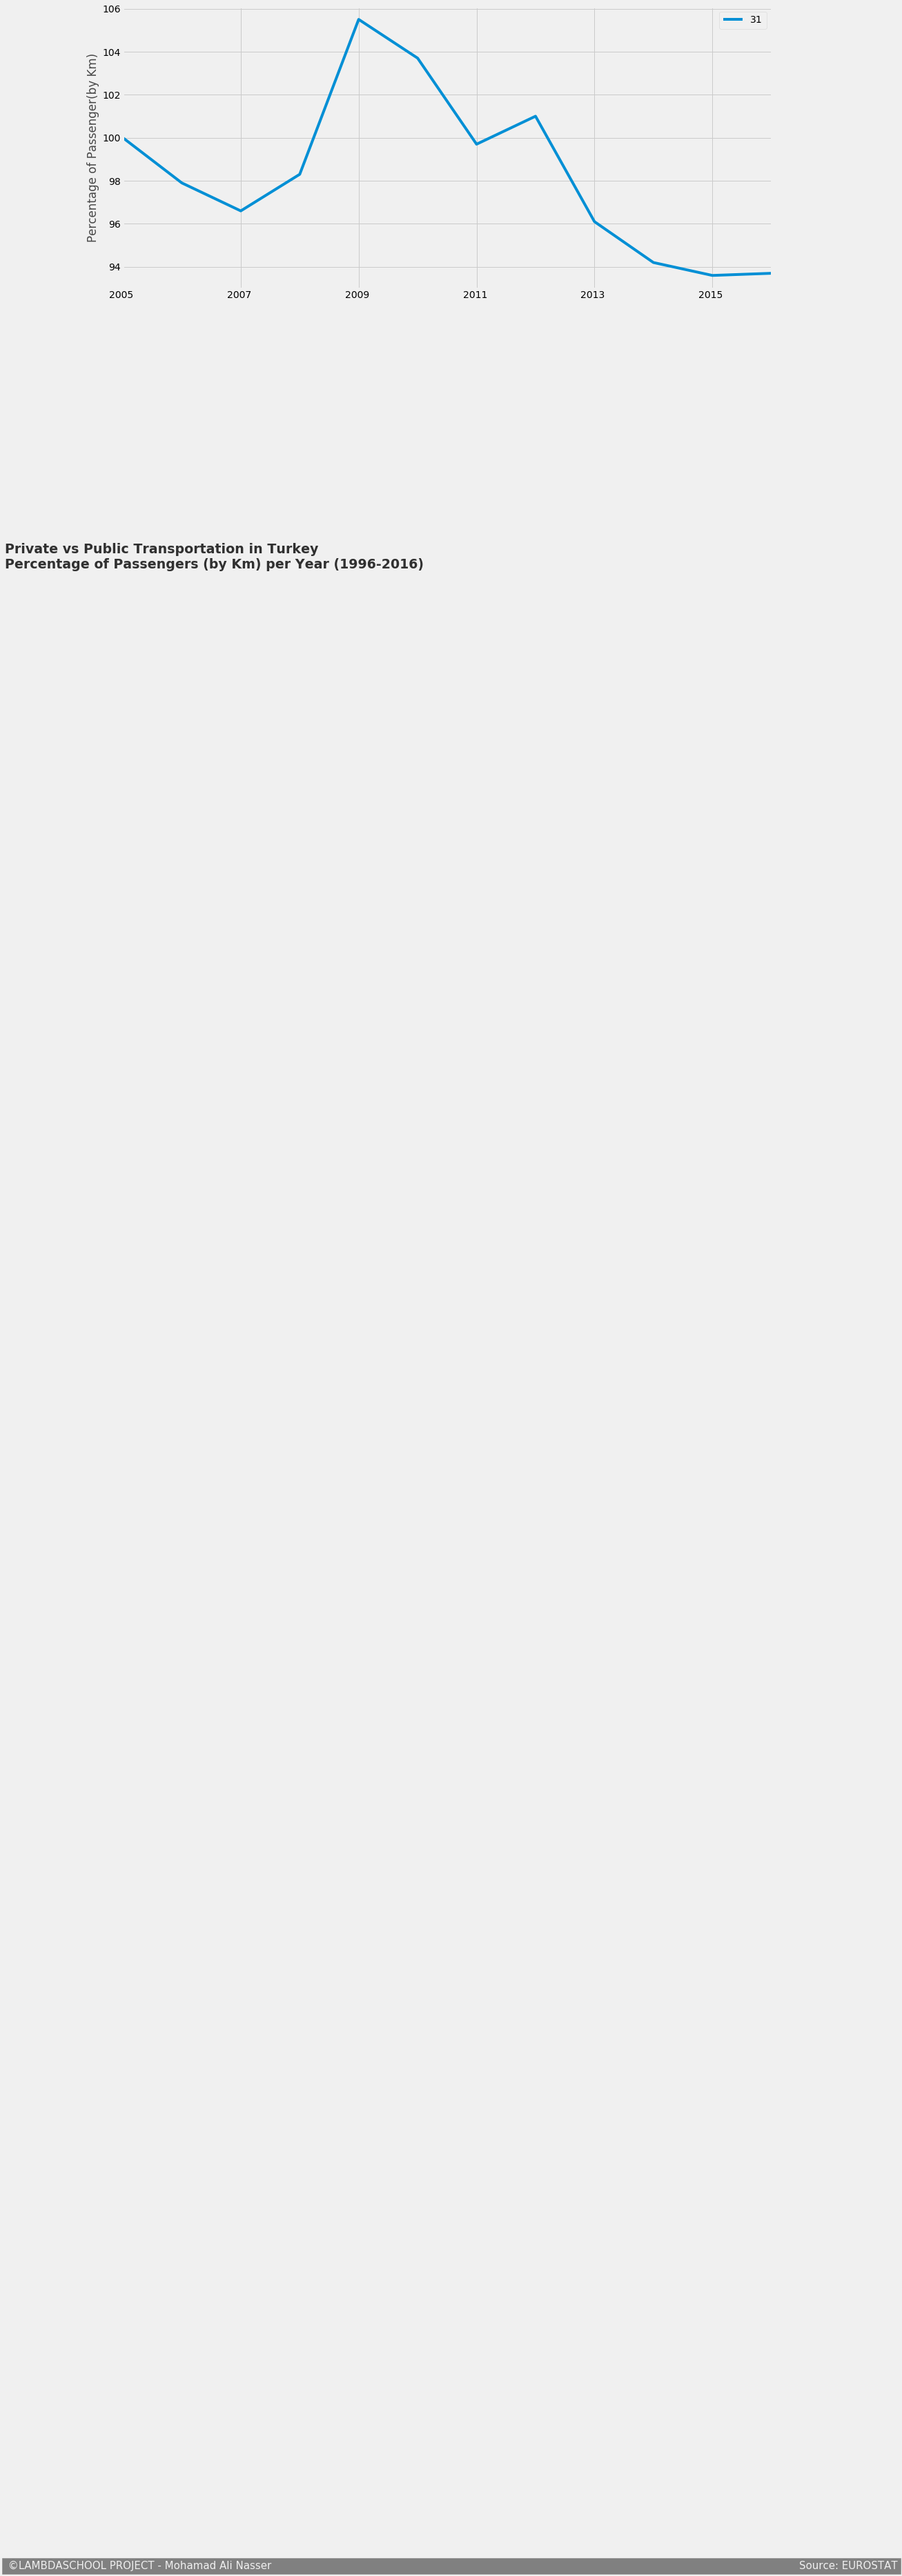

In [0]:
selectcountry2(df2, 'Turkey')

In [0]:

  plt.style.use('fivethirtyeight') # choose the 538 style
  ax = name.plot(figsize = (15,7)) # Plot

  
  # Titlem labels and text
  plt.ylabel('Percentage of Passenger(by Km)', alpha = 0.7)
  ax.text(x = -2, y = 80, s = 'Private vs Public Transportation in '+ country + '\nPercentage of Passengers (by Km) per Year (1996-2016)', fontsize = 19, color= 'black', alpha = 0.8,fontweight ='bold' )
  plt.text(x = -2, y = -13, s = ' ©LAMBDASCHOOL PROJECT - Mohamad Ali Nasser                                                                                                                                                                 Source: EUROSTAT', fontsize = 15, color= '#f0f0f0', backgroundcolor = 'grey')
  return plt.show()
  # Set x and y ticks
  plt.yticks([0, 10, 20, 30, 40, 50, 60, 70])
  ax.set_yticklabels(labels = ['0','10 ', '20', '30', '40','50','60','70%'], alpha =0.7)
  ax.set_xticklabels(labels = cols, alpha = 0.7)

In [0]:
selectcountry2(df2,'Turkey')

TypeError: ignored